# CNN 이진분류 (컬러이미지)
- 개와고양이 데이터셋

In [42]:
!pip install --q ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.62 s (started: 2024-09-11 02:51:29 +00:00)


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

time: 448 µs (started: 2024-09-11 02:51:33 +00:00)


## 1.데이터 준비

In [44]:
# !gdown https://drive.google.com/uc?id=1dC-Kso5FonYWtbxtJnJ8_dxO_Jlo8weR

time: 161 µs (started: 2024-09-11 02:51:33 +00:00)


In [45]:
# !unzip /content/cats_and_dogs.zip

time: 837 µs (started: 2024-09-11 02:51:33 +00:00)


In [46]:
data_root = '/content/cats_and_dogs'
train_dir = data_root + '/train'
test_dir = data_root + '/test'

print(train_dir)
print(test_dir)

/content/cats_and_dogs/train
/content/cats_and_dogs/test
time: 930 µs (started: 2024-09-11 02:51:33 +00:00)


### 데이터 로딩

In [47]:
class_name = ['cats', 'dogs']

time: 310 µs (started: 2024-09-11 02:51:33 +00:00)


In [48]:
import os

train_cats_fnames = os.listdir(train_dir + '/cats')
train_dogs_fnames = os.listdir(train_dir + '/dogs')

time: 2.71 ms (started: 2024-09-11 02:51:33 +00:00)


In [49]:
import PIL

X_train = []
y_train = []

for fname in train_cats_fnames:
    image = PIL.Image.open(train_dir + '/cats/' + fname)
    image = image.resize((224, 224))
    arr = np.array(image)
    X_train.append(arr)
    y_train.append(0)

len(X_train), len(y_train)

(1300, 1300)

time: 10.1 s (started: 2024-09-11 02:51:33 +00:00)


In [50]:
for fname in train_dogs_fnames:
    image = PIL.Image.open(train_dir + '/dogs/' + fname)
    image = image.resize((224, 224))
    arr = np.array(image)
    X_train.append(arr)
    y_train.append(1)

len(X_train), len(y_train) # 개 1300장, 고양이 1300장을 한 데 모아놓음

(2600, 2600)

time: 9.9 s (started: 2024-09-11 02:51:43 +00:00)


In [51]:
# 형태를 array로 바꿔줌
X_train = np.array(X_train)
y_train = np.array(y_train)

print(type(X_train), type(y_train))
print(X_train.shape, y_train.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(2600, 224, 224, 3) (2600,)
time: 170 ms (started: 2024-09-11 02:51:53 +00:00)


## 2.학습, 검증 데이터 분리

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,
                                                  shuffle=True,
                                                  random_state=42)

print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape) # 색상이 있어서 채널의 수가 3개임을 알 수 있음

(2080, 224, 224, 3) (520, 224, 224, 3)
(2080,) (520,)
time: 147 ms (started: 2024-09-11 02:51:53 +00:00)


In [53]:
X_train.shape

(2080, 224, 224, 3)

time: 9.6 ms (started: 2024-09-11 02:51:53 +00:00)


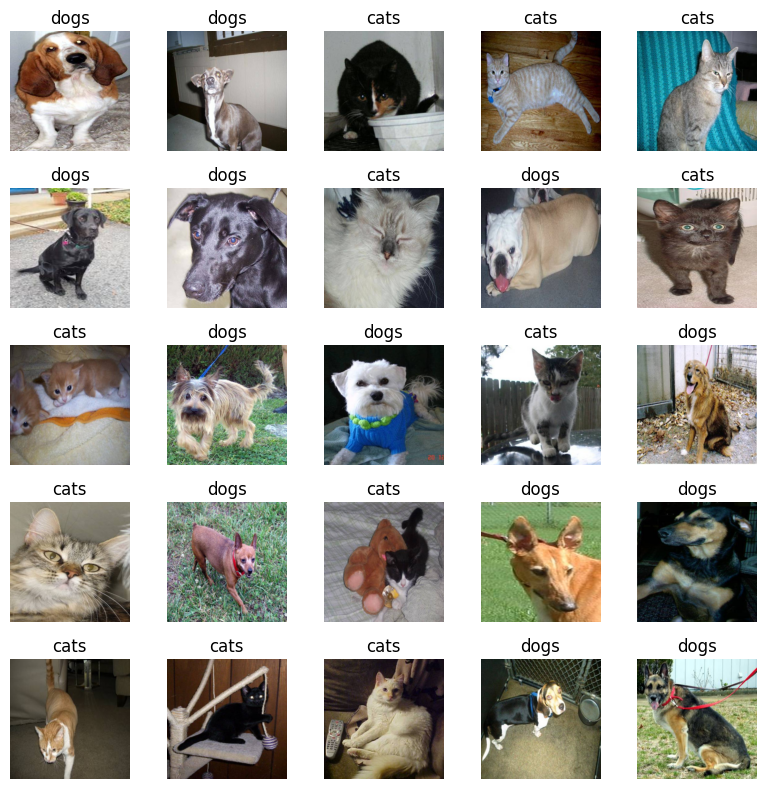

time: 5.61 s (started: 2024-09-11 02:51:53 +00:00)


In [54]:
# np.random.seed(42)
sample = np.random.randint(2080, size=25)

fig = plt.figure(figsize=(8, 8))
for i, idx in enumerate(sample):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.axis('off')
    plt.title(class_name[y_train[idx]])
fig.tight_layout()
plt.show()

## 3.전처리

In [55]:
X_train_s = X_train.astype('float')/255.
X_val_s = X_val.astype('float')/255.

time: 5.1 s (started: 2024-09-11 02:51:59 +00:00)


## 4.모델

In [56]:
X_train_s.shape

(2080, 224, 224, 3)

time: 7.19 ms (started: 2024-09-11 02:52:04 +00:00)


In [57]:
from keras import layers

model = keras.Sequential([
    layers.Conv2D(filters=16, kernel_size=3, activation='relu',
                  input_shape=(224, 224, 3)), # 흑백과 다른 점은 rgb 채널로 인해 마지막 요소가 3이라느 사실이다
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

time: 85.5 ms (started: 2024-09-11 02:52:04 +00:00)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │      11,944,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,949,281 (45.58 MB)

 Trainable params: 11,949,281 (45.58 MB)

 Non-trainable params: 0 (0.00 B)

time: 39.5 ms (started: 2024-09-11 02:52:04 +00:00)


In [59]:
from keras import layers

model = keras.Sequential()
model.add(layers.Conv2D(filters=16, kernel_size=3, activation='relu',
                  input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# 그냥 뭐 모델을 이런 식으로 하나씩 추가해서 구성할 수 있다는 걸 보여주는 정도.

time: 134 ms (started: 2024-09-11 02:52:04 +00:00)


In [60]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │      11,075,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │           4,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,103,553 (42.36 MB)

 Trainable params: 11,103,553 (42.36 MB)

 Non-trainable params: 0 (0.00 B)

time: 48.9 ms (started: 2024-09-11 02:52:04 +00:00)


In [61]:
model.compile(
    loss='binary_crossentropy', # 이진 분류이므로 binary 사용
    optimizer='adam',
    metrics=['accuracy']
)

time: 7.62 ms (started: 2024-09-11 02:52:04 +00:00)


In [62]:
from keras import callbacks

es = callbacks.EarlyStopping(monitor="val_loss",patience=5)
ckpt_path = './temp/cats_dogs.weights.h5'
ckpt = keras.callbacks.ModelCheckpoint(
    ckpt_path,
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True)

time: 723 µs (started: 2024-09-11 02:52:04 +00:00)


In [63]:
EPOCHS = 20
BATCH_SIZE = 32

history = model.fit(X_train_s, y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=[es, ckpt],
                    validation_data=(X_val_s, y_val))

Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.4986 - loss: 0.7373 - val_accuracy: 0.5423 - val_loss: 0.6612
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.6099 - loss: 0.6560 - val_accuracy: 0.6500 - val_loss: 0.6396
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.6958 - loss: 0.5758 - val_accuracy: 0.6577 - val_loss: 0.6283
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7728 - loss: 0.4806 - val_accuracy: 0.6635 - val_loss: 0.6406
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8229 - loss: 0.3952 - val_accuracy: 0.6712 - val_loss: 0.6981
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8727 - loss: 0.3076 - val_accuracy: 0.6692 - val_loss: 0.7409
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9044 - loss: 0.2422 - val_accuracy: 0.6654 - val_loss: 0.8001
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9500 - loss: 0.1475 - val_accuracy: 0.6808 - v

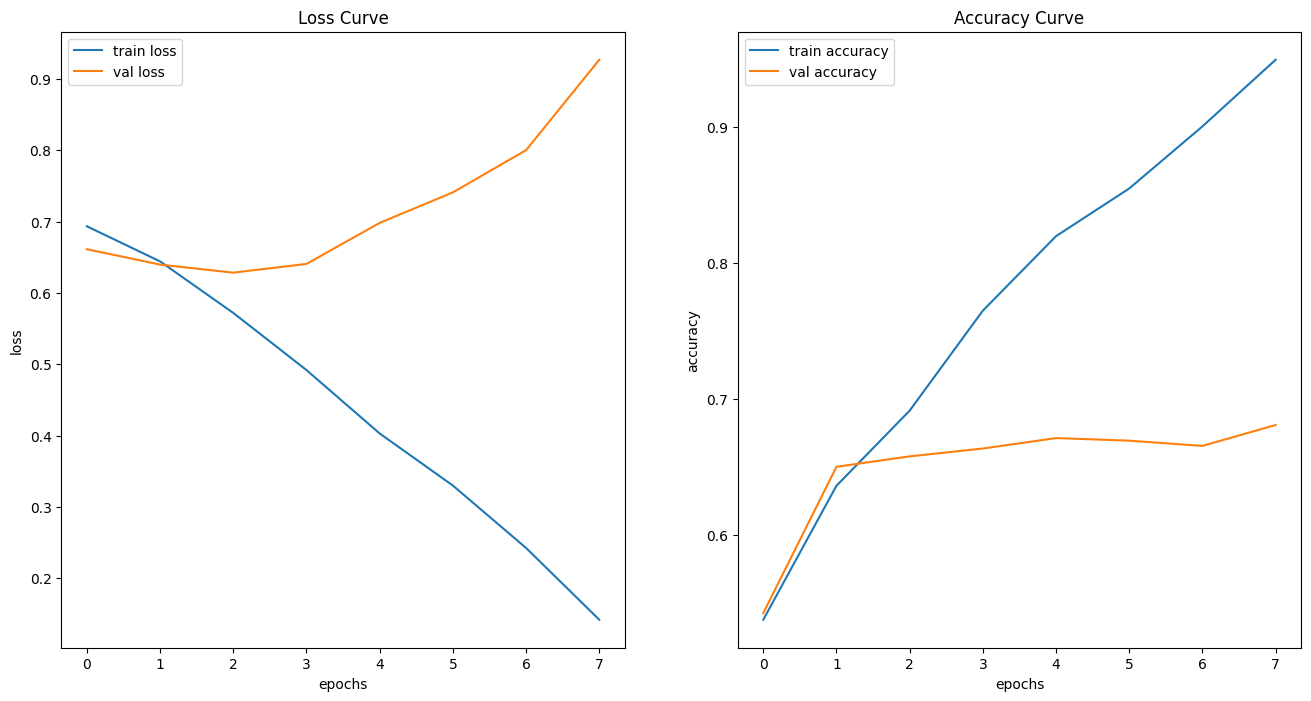

time: 409 ms (started: 2024-09-11 02:52:41 +00:00)


In [64]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

plot_history(history)

In [65]:
# 베스트 체크포인트 로딩...

model.load_weights(ckpt_path)

time: 120 ms (started: 2024-09-11 02:52:42 +00:00)


## 5.검증

In [66]:
# 테스트데이터 전처리
# 평가(메트릭스)

time: 312 µs (started: 2024-09-11 02:52:42 +00:00)


In [67]:
test_cats_fnames = os.listdir(test_dir + '/cats')
test_dogs_fnames = os.listdir(test_dir + '/dogs')

time: 946 µs (started: 2024-09-11 02:52:42 +00:00)


In [68]:
X_test = []
y_test = []

for fname in test_cats_fnames:
    image = PIL.Image.open(test_dir + '/cats/' + fname)
    image = image.resize((224, 224))
    arr = np.array(image)
    X_test.append(arr)
    y_test.append(0)

len(X_test), len(y_test)

(200, 200)

time: 712 ms (started: 2024-09-11 02:52:42 +00:00)


In [69]:
for fname in test_dogs_fnames:
    image = PIL.Image.open(test_dir + '/dogs/' + fname)
    image = image.resize((224, 224))
    arr = np.array(image)
    X_test.append(arr)
    y_test.append(1)

len(X_test), len(y_test)

(400, 400)

time: 748 ms (started: 2024-09-11 02:52:42 +00:00)


In [70]:
# 형태를 array로 바꿔줌
X_test = np.array(X_test)
y_test = np.array(y_test)

print(type(X_test), type(y_test))
print(X_test.shape, y_test.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(400, 224, 224, 3) (400,)
time: 18.5 ms (started: 2024-09-11 02:52:43 +00:00)


In [71]:
X_test_s = X_test.astype('float')/255.
X_test_s.shape

(400, 224, 224, 3)

time: 179 ms (started: 2024-09-11 02:52:43 +00:00)


In [72]:
y_pred = model.predict(X_test_s)
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred, y_test

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


(array([[0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],

time: 1.28 s (started: 2024-09-11 02:52:43 +00:00)


accuracy: 0.7275
recall: 0.7275
precision: 0.727505687642191
f1 : 0.7274982968643554


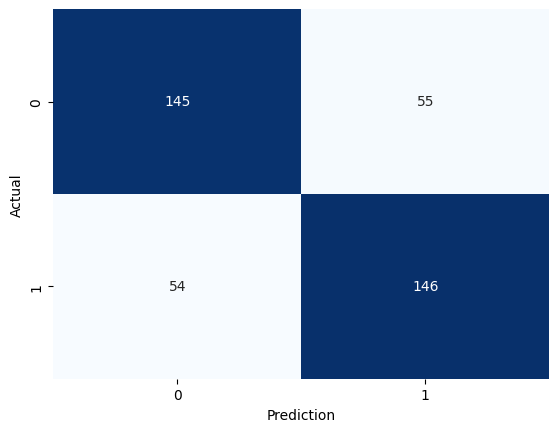

time: 120 ms (started: 2024-09-11 02:52:45 +00:00)


In [73]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true, y_pred, aver='binary'):
    print('accuracy:', accuracy_score(y_true, y_pred))
    print('recall:', recall_score(y_true, y_pred ,average=aver))
    print('precision:', precision_score(y_true, y_pred,average=aver))
    print('f1 :', f1_score(y_true, y_pred, average=aver))

    cfm = confusion_matrix(y_true, y_pred)
    s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
    s.set(xlabel='Prediction', ylabel='Actual')
    plt.show()

print_metrics(y_test, y_pred, aver='macro')